In [46]:
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import pysal as ps
import mplleaflet
import geopandas as gp
import json
import statsmodels.api as sm
import pylab as plt
import statsmodels.formula.api as smf
from mpl_toolkits.basemap import Basemap
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [47]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [48]:
geodata = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
geodata1 = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
geod = pd.DataFrame({'zip':geodata['postalCode'].astype(float)}).drop_duplicates()
#geod.head()



In [50]:
l = []
for i in range(20):
    n='df'+str(i)
    l.append(n)

In [51]:
k=0
for i in range(94,100):
        if k<6:
            
            fname = 'zbp'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            name = 'df'+str(k)
            our_text_file = zf.open('zbp'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
            
    
for i in range(0,11):
         if k>=6 and k<16:   
            #print i
            fname = 'zbp0'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp0'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            k=k+1
            #print k
    
for i in range(0,4):
        if k>=16:
            fname = 'zbp1'+str(i)+'totals.zip'
            zf = zipfile.ZipFile(fname)
            #l_z = zf.namelist()
            #print l and see which file to open
            name = 'df'+str(k)
            our_text_file = zf.open('zbp1'+str(i)+'totals.txt')
            globals()[name] = pd.read_csv(our_text_file)
            
            k=k+1
        

In [52]:
f = df0[(df0['zip']>10000) & (df0['zip']<11692)]


In [53]:
data_f = geod

In [54]:

for i in range(20):
    
    name = 'data'+str(i)
    name_c = 'df'+str(i)
    df = globals()[name_c]
    if (i>3) and (i<9):  
        df = df[['ZIP','EST']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    else :
        df = df[['zip','est']]
        df.columns = ['zip','est'+str(i)]
        df = pd.merge(geod,df,on='zip')
    globals()[name] = df
    data_f['est'+str(i)] = df['est'+str(i)]



In [55]:
np.shape(data_f)

(247, 21)

In [56]:
df_array = data_f.as_matrix()

In [57]:
data_f.columns

Index([u'zip', u'est0', u'est1', u'est2', u'est3', u'est4', u'est5', u'est6',
       u'est7', u'est8', u'est9', u'est10', u'est11', u'est12', u'est13',
       u'est14', u'est15', u'est16', u'est17', u'est18', u'est19'],
      dtype='object')

In [58]:
badindex = []
for i,est in enumerate(df_array):
    if np.isnan(est).any():
        badindex.append(i)
        
clean_est = np.delete(df_array, badindex, 0)

In [60]:
np.shape(clean_est)

(224, 21)

In [92]:
y=range(1994,2014)

([<matplotlib.axis.XTick at 0x125025310>,
 <a list of 20 Text xticklabel objects>)

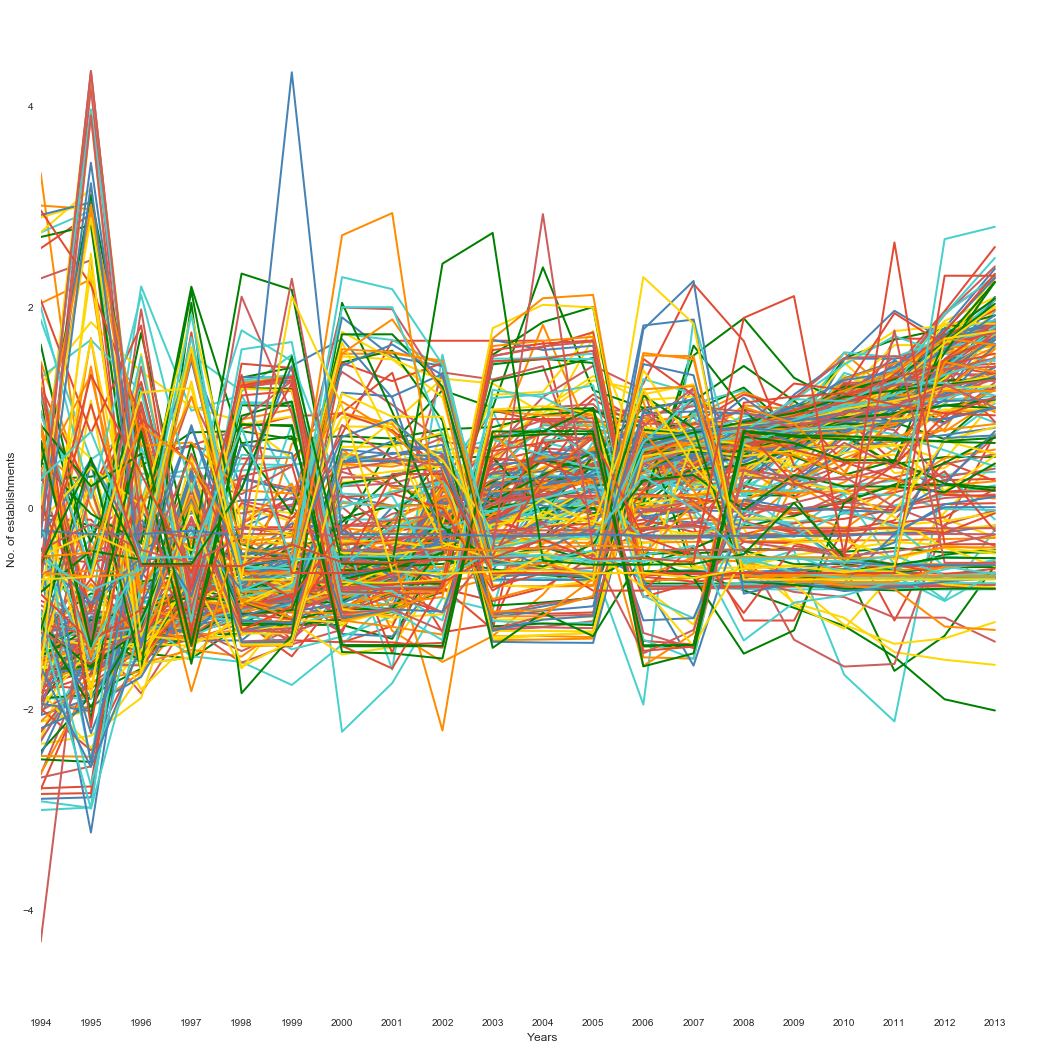

In [93]:
plt.figure(figsize=(18, 18), dpi=200)
cluster_array = []
zips = []
s = []
for i in range(224):
    nd = clean_est[i][1:]
    zips.append(clean_est[i][0])
    s.append(nd)
    nd_mean = np.mean(clean_est[i][1:])
    nd_std = np.std(clean_est[i][1:])
    for i in range(len(nd)):
        nd[i] = (nd[i]-nd_mean)/nd_std
    plt.plot(range(20),nd)
    cluster_array.append(nd)
    clean_est[i][1:] = nd   
plt.xlabel('Years')
plt.ylabel('No. of establishments')
plt.xticks(range(20),y)

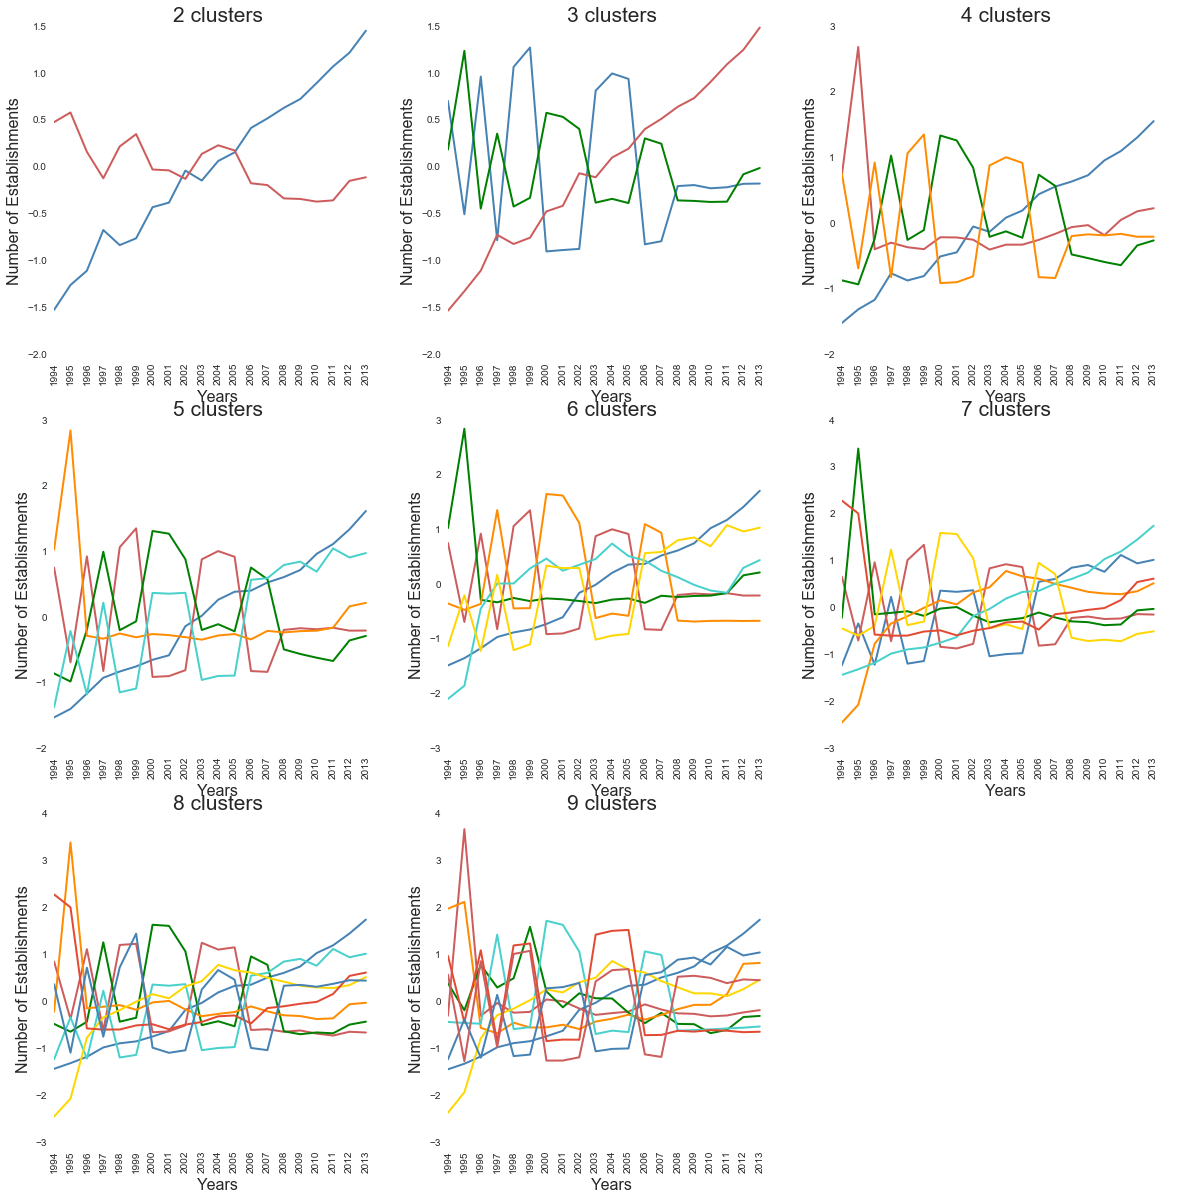

In [104]:
from sklearn.cluster import k_means
plt.figure(figsize=(20, 20))

p = 1
for i in range(2,10):

    est=k_means(s,n_clusters = i)
    plt.subplot(3, 3, p)
    p += 1
    plt.plot(range(20), np.transpose(est[0]))
    plt.title(str(i)+' clusters', fontsize = 21)
    plt.ylabel('Number of Establishments', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)
    plt.xticks(range(20), y, rotation = 90);
    plt.legend()

In [63]:
with_zip=pd.DataFrame()
with_zip['zip'] = zips

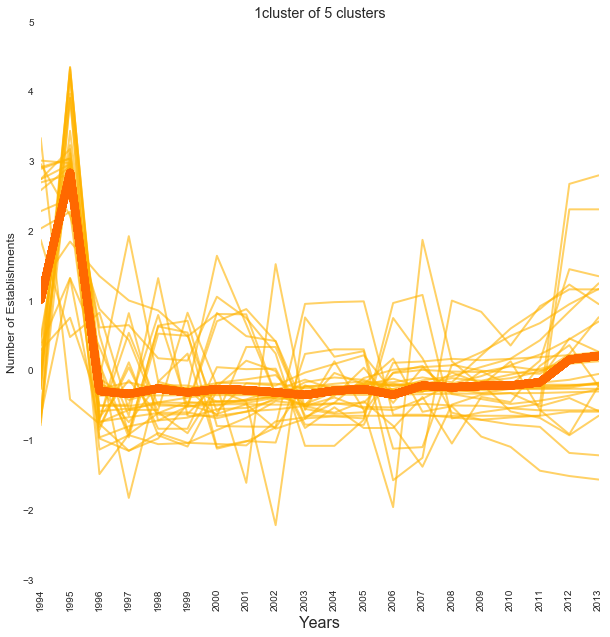

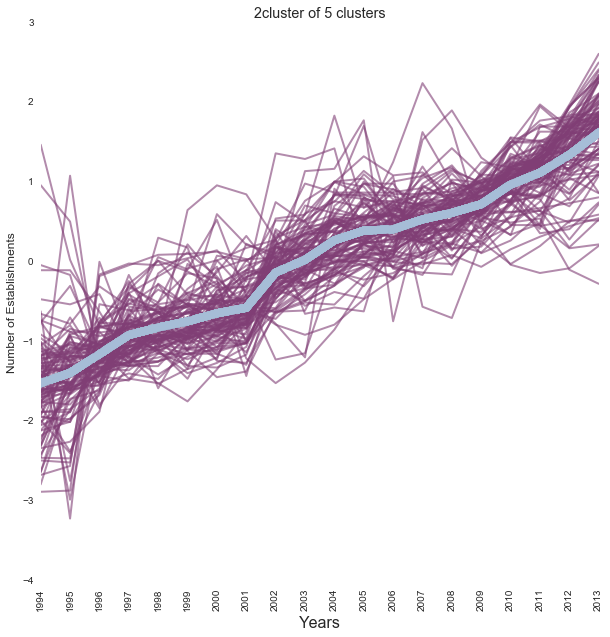

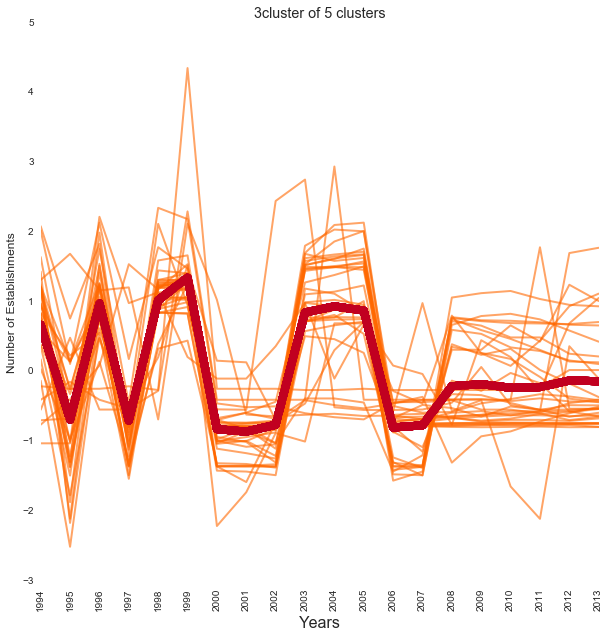

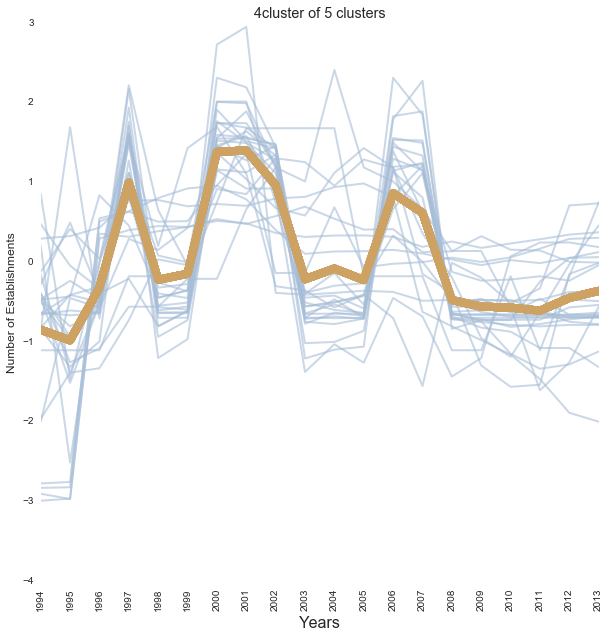

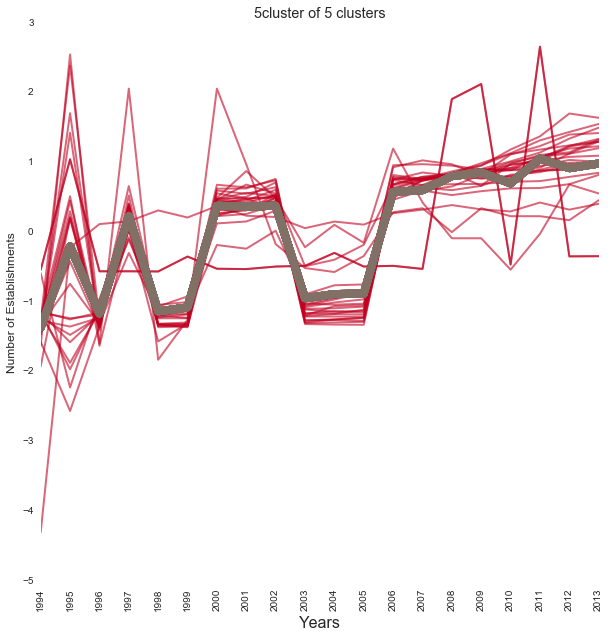

In [110]:
cl = cluster_array
with_zip['cluster'] = est[1]
c = k_means(cluster_array,n_clusters=5)
i = 0

for m in range(5):
    i = 0
    fig0 = plt.figure(figsize=(10,10));
    ax0 = fig0.add_subplot(1,1,1);
    plt.ylabel('Number of Establishments')
    plt.xlabel('Years', fontsize = 16)
    plt.title(str(m+1)+'cluster of 5 clusters')
    plt.xticks(range(20), y, rotation = 90);
    for k in c[1]:
        if k==m:
            ax0.plot(range(20),cluster_array[i],c=kelly_colors_hex[m],alpha=0.6)
            ax0.plot(range(20),c[0][k],c=kelly_colors_hex[m+2],lw=8)
        i = i+1
        


In [78]:
geodata['zip'] = geodata['postalCode'].astype(float)
geo = geodata.join(with_zip,rsuffix='zip',how='inner')

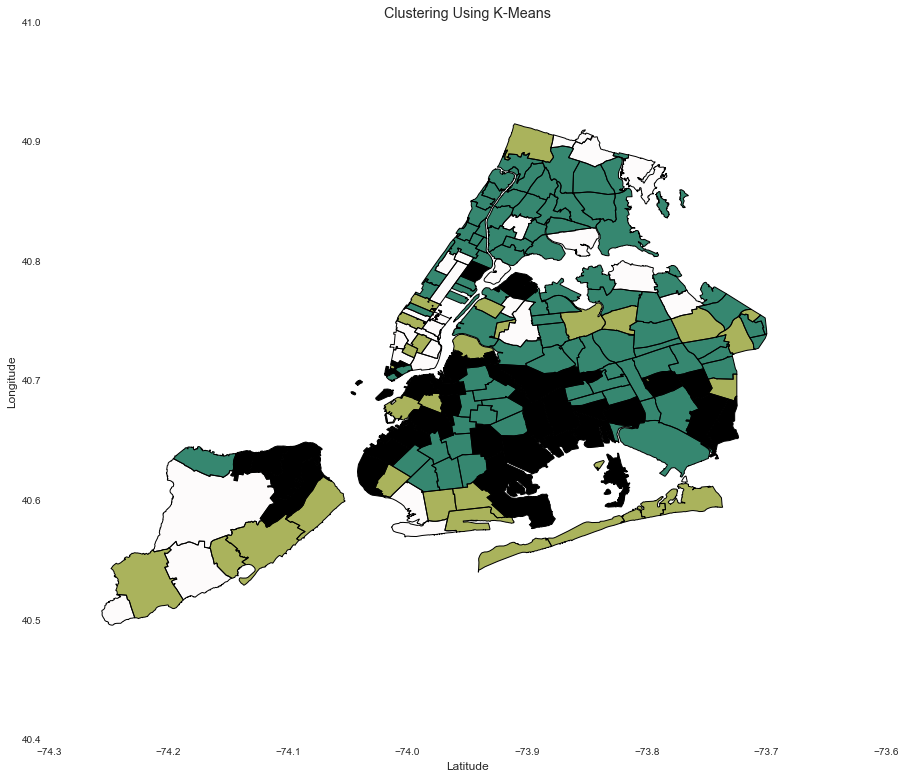

In [120]:
#fig1=figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
#fig1.add_subplot(111)
geo.plot(column='cluster', scheme='QUANTILES', alpha=1, colormap='gist_earth',figsize=(15,15))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering Using K-Means')


In [80]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, compute_full_tree=True).fit(s)

In [81]:
with_zip['cluster2'] = agc.labels_

In [82]:
geodata1['zip'] = geodata1['postalCode'].astype(float)
geo1 = geodata1.join(with_zip,rsuffix='zip',how='inner')

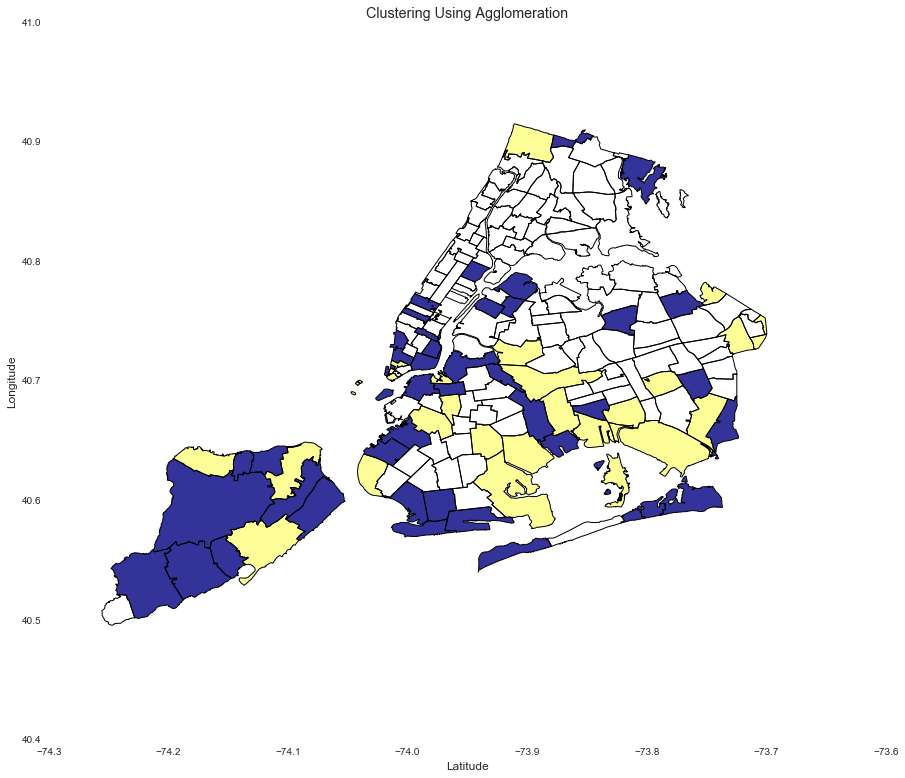

In [122]:
geo1.plot(column='cluster2', scheme='QUANTILES', alpha=1, colormap='terrain',figsize=(15,15))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering Using Agglomeration')

In [128]:
import pandas as pd
from scipy.cluster.vq import whiten
import datetime as dt
w = whiten(clean_est)

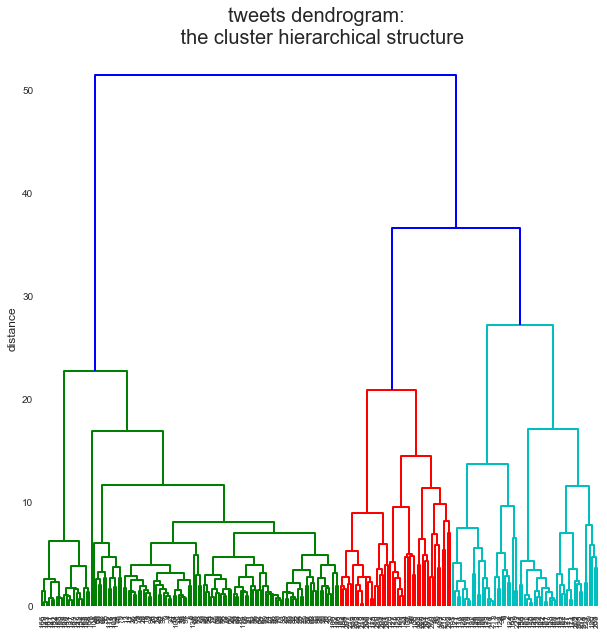

In [132]:
import scipy.cluster as scp
fig = plt.figure(figsize=(10,10))
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(w, method='ward'),
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
#pl.xticks(rotation=90)
plt.grid('off')
plt.title("tweets dendrogram: \n the cluster hierarchical structure", fontsize=20)
#this is a dendrogram for inspection of the hierarchical structure